<a href="https://colab.research.google.com/github/marekcrn/MLF/blob/main/Lab3/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# SVM for classification

from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [54]:
from sklearn.model_selection import train_test_split
X=iris.data[iris.target!=2,0:2] # chosing first 2 columns and first 2 classes
y=iris.target[iris.target!=2]   # chosing first 2 classes
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape) # for training
print(X_test.shape)  # for testing
print(y_test)        # classes    iris.target!=2,

(80, 2)
(20, 2)
[1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1]


In [64]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear') # separating line
SVMmodel.fit(X_train,y_train) # training phase (fit)
SVMmodel.get_params()
#SVMmodel.score(X_test,y_test) # testing phase (score)

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

[[ 2.22222054 -2.22221527]]
[-5.00001052]


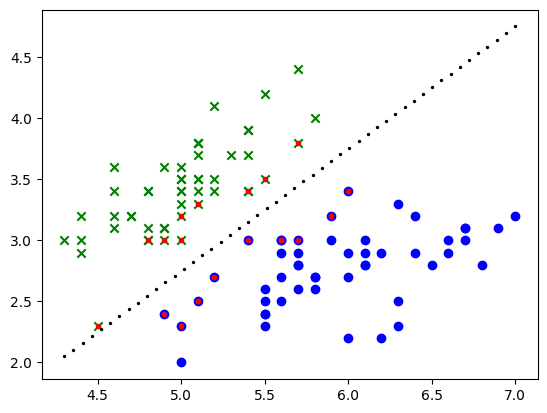

In [76]:
import matplotlib.pyplot as plt
import numpy as np

plot = plt.figure()
plot = plt.scatter(X[y==0,0],X[y==0,1],color='green', marker='x') # Plotting data for class 0
plot = plt.scatter(X[y==1,0],X[y==1,1],color='blue', marker='o')  # Plotting data for class 1
# plot = plt.scatter(X[y==2,0],X[y==2,1],color='red', marker='+') # Plotting data for class 2

# Line: w*x+b=0 => [w0 w1]*[x0 x1]+b=0 => w0x0+w1x1+b=0
supvectors=SVMmodel.support_vectors_

# Plot the support vectors here
plot = plt.scatter(supvectors[:,0:1],supvectors[:,1:2],color='red', marker='.')

# Separating line coefficients:
W=SVMmodel.coef_
b=SVMmodel.intercept_
print(W)
print(b)

xgr = np.linspace(min(X[:,0]), max(X[:,0]), num=50)
ygr = -W[:,0]/W[:,1]*xgr-b/W[:,1]

plot = plt.scatter(xgr, ygr, s=2,color='black')
plt.show(plot)